## Données pour effectuer l'entrainement

In [1]:
import numpy as np 

training = np.genfromtxt("fleurs_training.csv", delimiter=",")#importation du fichier csv
nRow, nCol = training.shape
training_data1 = training[:, 0:4] #on enlève la dernière colonne du numéro d'espèce, contient les features
training_targets = training[:, -1]#contient le numéro des epsèces
print(f"There are {nRow} rows and {nCol} columns")
#print(training_data1)
#print(training_targets)


There are 120 rows and 5 columns


# Normalisation des données d'entraînement

In [2]:
#pour que chaque paramètre ai autant d'impact pour le modèle
mean = training_data1.mean(axis=0) #moyenne sur les 120 fleurs, première colonne contient le nbr de fleurs
training_data1 -= mean
std = training_data1.std(axis=0) #standard deviation
training_data1 /= std

# Séparation des données d'entraînement en training et validation

In [3]:
#séparation des données d'entraînement en un lot data (potentiel_train) et label(validation), en des lots de 90 et 30 données
training_data = training_data1[:90,:]#changer ça
training_labels = training_targets[:90]
nRow2, nCol2 = training_data.shape
print(f"Données d'entraînement : There are {nRow2} rows and {nCol2} columns")
print(training_labels.shape)

fleurs_validation_data = training_data1[90:,:]
fleurs_validation_labels = training_targets[90:]
nRow3, nCol3= fleurs_validation_data.shape
print(f"Données de validation : There are {nRow3} rows and {nCol3} columns")
print(fleurs_validation_labels.shape)

Données d'entraînement : There are 90 rows and 4 columns
(90,)
Données de validation : There are 30 rows and 4 columns
(30,)


## Données pour faire le test

In [4]:
test = np.genfromtxt("fleurs_test.csv", delimiter=",")
nRow, nCol = test.shape
test_data = test[:, 0:4]
test_targets = test[:, -1]
print(f"There are {nRow} rows and {nCol} columns")
#print(fleurs_test_data)
#print(fleurs_test_targets)

There are 30 rows and 5 columns


# Normalisation des données de test

In [5]:
#normalise aussi les données de test pour que le modèle puisse les reconnaître
test_data -= mean #normalisé avec les données de test
test_data /= std

# Exercice

Voir le sujet donné sur papier

# Création du réseau de neurones

In [6]:
#classification multiclass
#dernière couche, 3 neurones avec activation softmax
#après aller plus loin en appliquant la technique kfold car que 120 échantillons par exemple k=4
#essayer pour différentes couches de réseaux de neurones et différent nbr de neurones pour tester,
#on ajuste les hyperparamètres pour certaines données de validation, puis ensuite on regarde si les résultats 
#son correctes pour les données de test.


#importation des bibliothèques
from tensorflow import keras
from tensorflow.keras import layers

#construction du modèle à 3 couches avec un certain nbr de neurones par couche
#nbr de neurones en puissance de 2
def get_model():
    model = keras.Sequential([
        #layers.Dense(32, activation="relu"), #relu(x)=max(x, 0)
        layers.Dense(512, activation="relu"),
        layers.Dense(3, activation="softmax") #donne une probabilité de distribution, 3 espèces possibles, softmax pour multiclass
    ])
    #compilation du modèle
    #si on a du one-hot encoding (que des 1 et des 0), loss=categorical_crossentropy
    model.compile(optimizer="rmsprop", #détermine comment le "learning" progresse
                  loss="sparse_categorical_crossentropy", #définie le feedback utilisé pour "learning", multiclass
                  metrics=["accuracy"]) #évalue la performance du modèle
    return model

model = get_model()


#entraînement du modèle
history = model.fit(
    training_data,training_labels,
    epochs=200,#nbr d'itérations
    batch_size=32, #taille d'un lot d'entraînement, prendre un batch de petite taille
    validation_data=(fleurs_validation_data, fleurs_validation_labels))








Epoch 1/200


3/3 [==============================] - 2s 220ms/step - loss: 0.9945 - accuracy: 0.5222 - val_loss: 0.8040 - val_accuracy: 0.9000
Epoch 2/200
3/3 [==============================] - 0s 44ms/step - loss: 0.7721 - accuracy: 0.8000 - val_loss: 0.6519 - val_accuracy: 0.9000
Epoch 3/200
3/3 [==============================] - 0s 44ms/step - loss: 0.6554 - accuracy: 0.8222 - val_loss: 0.5541 - val_accuracy: 0.9333
Epoch 4/200
3/3 [==============================] - 0s 40ms/step - loss: 0.5849 - accuracy: 0.8222 - val_loss: 0.4889 - val_accuracy: 0.9667
Epoch 5/200
3/3 [==============================] - 0s 36ms/step - loss: 0.5280 - accuracy: 0.8222 - val_loss: 0.4371 - val_accuracy: 0.9667
Epoch 6/200
3/3 [==============================] - 0s 52ms/step - loss: 0.4885 - accuracy: 0.8222 - val_loss: 0.3968 - val_accuracy: 0.9667
Epoch 7/200
3/3 [==============================] - 0s 44ms/step - loss: 0.4559 - accuracy: 0.8222 - val_loss: 0.3652 - val_accuracy: 0.9667
Epoch 8/200
3/

3/3 [==============================] - 0s 48ms/step - loss: 0.0511 - accuracy: 0.9778 - val_loss: 0.0716 - val_accuracy: 0.9333
Epoch 110/200
3/3 [==============================] - 0s 48ms/step - loss: 0.0485 - accuracy: 0.9889 - val_loss: 0.0764 - val_accuracy: 0.9333
Epoch 111/200
3/3 [==============================] - 0s 44ms/step - loss: 0.0490 - accuracy: 0.9889 - val_loss: 0.0760 - val_accuracy: 0.9333
Epoch 112/200
3/3 [==============================] - 0s 44ms/step - loss: 0.0478 - accuracy: 0.9889 - val_loss: 0.0750 - val_accuracy: 0.9333
Epoch 113/200
3/3 [==============================] - 0s 44ms/step - loss: 0.0521 - accuracy: 0.9889 - val_loss: 0.0773 - val_accuracy: 0.9333
Epoch 114/200
3/3 [==============================] - 0s 36ms/step - loss: 0.0499 - accuracy: 0.9778 - val_loss: 0.0756 - val_accuracy: 0.9333
Epoch 115/200
3/3 [==============================] - 0s 49ms/step - loss: 0.0482 - accuracy: 0.9778 - val_loss: 0.0713 - val_accuracy: 0.9333
Epoch 116/200
3/3 [=

Epoch 167/200
3/3 [==============================] - 0s 52ms/step - loss: 0.0412 - accuracy: 0.9889 - val_loss: 0.0602 - val_accuracy: 0.9667
Epoch 168/200
3/3 [==============================] - 0s 52ms/step - loss: 0.0384 - accuracy: 0.9889 - val_loss: 0.0573 - val_accuracy: 0.9667
Epoch 169/200
3/3 [==============================] - 0s 44ms/step - loss: 0.0414 - accuracy: 0.9889 - val_loss: 0.0601 - val_accuracy: 0.9667
Epoch 170/200
3/3 [==============================] - 0s 64ms/step - loss: 0.0396 - accuracy: 0.9889 - val_loss: 0.0628 - val_accuracy: 0.9667
Epoch 171/200
3/3 [==============================] - 0s 55ms/step - loss: 0.0389 - accuracy: 0.9889 - val_loss: 0.0574 - val_accuracy: 0.9667
Epoch 172/200
3/3 [==============================] - 0s 56ms/step - loss: 0.0376 - accuracy: 0.9889 - val_loss: 0.0605 - val_accuracy: 0.9667
Epoch 173/200
3/3 [==============================] - 0s 72ms/step - loss: 0.0397 - accuracy: 0.9889 - val_loss: 0.0637 - val_accuracy: 0.9667
Epoch 

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               2560      
                                                                 
 dense_1 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 4099 (16.01 KB)
Trainable params: 4099 (16.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Evolution de la fonction de perte

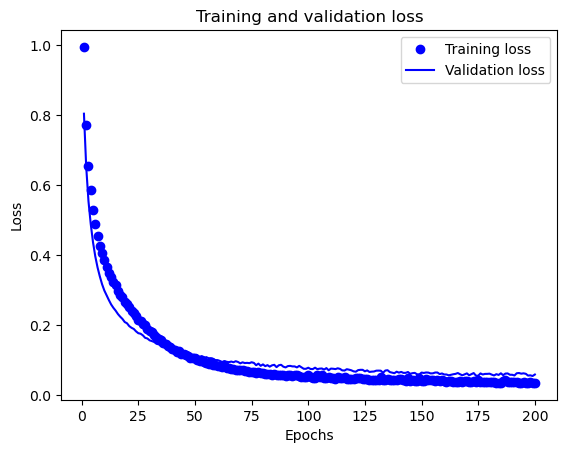

In [8]:
#évaluation de la fonction de perte
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim(0, 0.3)
plt.legend()
plt.show()

# Evolution de l'accuracy

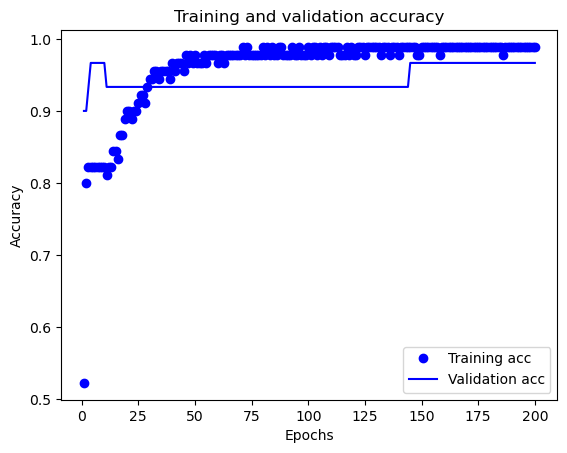

In [9]:
plt.clf()

acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
#si accuracy saccadé, pas assez de données

# Détermination de l'espèce d'une fleur

In [10]:
#!!!!!!!!!!!!!!!!!!!!!!!!!!!     il faut normaliser avant de tester les nouvelles caractéristiques        !!!!!!!!!!!!!!!!
caractéristiques_fleur_test = np.array([[6.6, 3.3, 5.8, 2.5]])
predictions = model.predict(caractéristiques_fleur_test)

print(predictions)

1/1 [==============================] - 0s 209ms/step
[[1.7291733e-27 5.7396445e-25 1.0000000e+00]]


In [11]:
#test avec des valeurs du csv test_data
fleur1 = np.array([[5.9,3.0,4.2,1.5]])
predict1 = model.predict(fleur1)

print("fleur1 :", predict1) #doit appartenir à l'espèce 1

fleur2 = np.array([[5.1,3.3,1.7,0.5]])
predict2 = model.predict(fleur2)

print("fleur2:", predict2) #doit appartenir à l'espèce 0

1/1 [==============================] - 0s 56ms/step
fleur1 : [[1.1676104e-18 1.8465227e-15 1.0000000e+00]]
1/1 [==============================] - 0s 64ms/step
fleur2: [[7.146416e-06 3.809937e-01 6.189992e-01]]


# Test méthode kfold

In [ ]:
#méthode kfold permet "d'aplatir" les courbes et de mieux visualiser ou se situe le minimum pour la fonction de perte,
#et donc trouver le nbr d'epoch opptimal correspondant